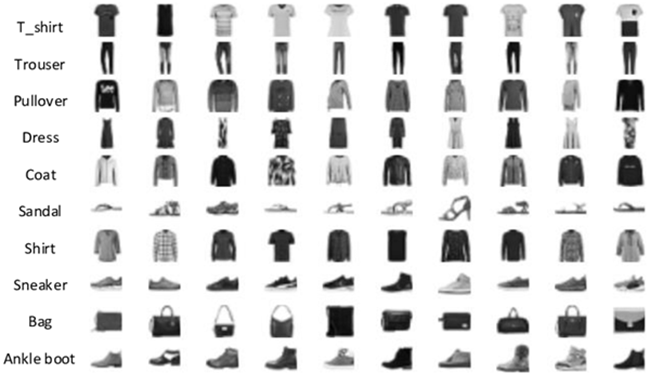

### Gerekli kütüphaneleri yükleme

In [68]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


### Veri setini yükleme

In [69]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Veriyi normalize etme

In [70]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Modeli oluşturma

In [71]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),  
    layers.Dropout(0.4),  
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

### Modeli derleme

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Modeli eğitme

In [73]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5880 - accuracy: 0.7871 - val_loss: 0.4226 - val_accuracy: 0.8451
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4489 - accuracy: 0.8370 - val_loss: 0.4191 - val_accuracy: 0.8451
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4129 - accuracy: 0.8487 - val_loss: 0.3959 - val_accuracy: 0.8538
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3937 - accuracy: 0.8557 - val_loss: 0.3675 - val_accuracy: 0.8689
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3790 - accuracy: 0.8599 - val_loss: 0.3728 - val_accuracy: 0.8636
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3704 - accuracy: 0.8654 - val_loss: 0.3533 - val_accuracy: 0.8723
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3566 - accuracy: 0.8684 - val_loss: 0.3808 - val_accu

### Modeli değerlendirme

In [74]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.3338 - accuracy: 0.8809 - 804ms/epoch - 3ms/step

Test accuracy: 0.8809000253677368


### Eğitim sürecini görselleştirme

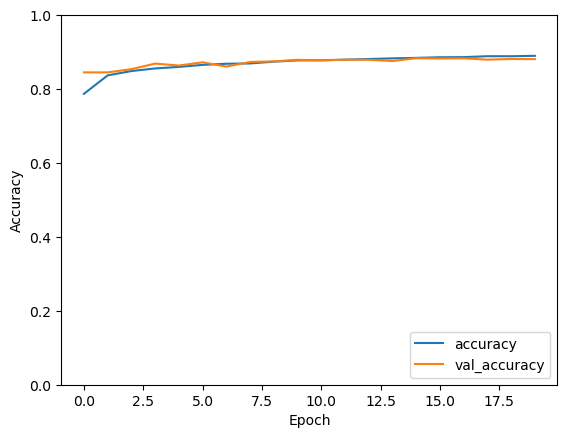

In [75]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


### Rastgele beş görsel seçme

In [82]:
random_indices = np.random.choice(test_images.shape[0], size=5, replace=False)


### Sınıf etiketlerini tanımlama

In [83]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Seçilen beş görsel için tahminleri ve gerçek sınıfları gösterme

1/1 [==============================] - 0s 29ms/step


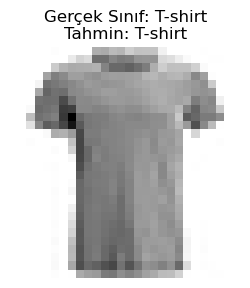

1/1 [==============================] - 0s 28ms/step


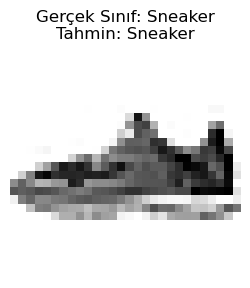

1/1 [==============================] - 0s 29ms/step


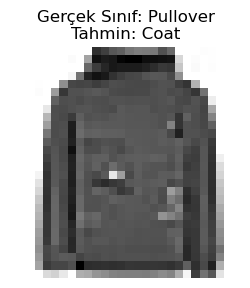

1/1 [==============================] - 0s 28ms/step


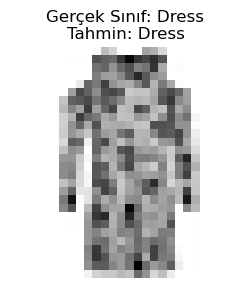

1/1 [==============================] - 0s 31ms/step


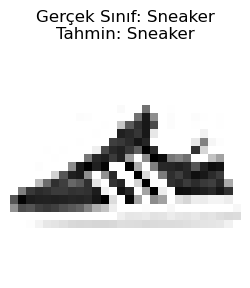

In [84]:
for index in random_indices:
    # Modeli kullanarak tahmin yapma
    y_pred_single = model.predict(np.expand_dims(test_images[index], axis=0))
    predicted_class_single = np.argmax(y_pred_single)

    # Görseli ve tahminleri gösterme
    plt.figure(figsize=(3, 3))
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f"Gerçek Sınıf: {class_names[test_labels[index]]}\nTahmin: {class_names[predicted_class_single]}")
    plt.axis('off')
    plt.show()